## K-Means Clustering


### 1. Load and inspect data

It's a sample data for the sake of conceptual understanding. We'll also work on the realtime data as well.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sagarchhabriya/clustering")

print("Path to dataset files:", path)

C:\Users\PMLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 876/876 [00:00<00:00, 185kB/s]

Extracting files...
Path to dataset files: C:\Users\PMLS\.cache\kagglehub\datasets\sagarchhabriya\clustering\versions\1


In [2]:
import os

os.listdir(path)

['student_clustering.csv']

In [3]:
import pandas as pd
df = pd.read_csv( path + "/student_clustering.csv")
df

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110
...,...,...
195,4.68,89
196,8.57,118
197,5.85,112
198,6.23,108


### 2. Visualize

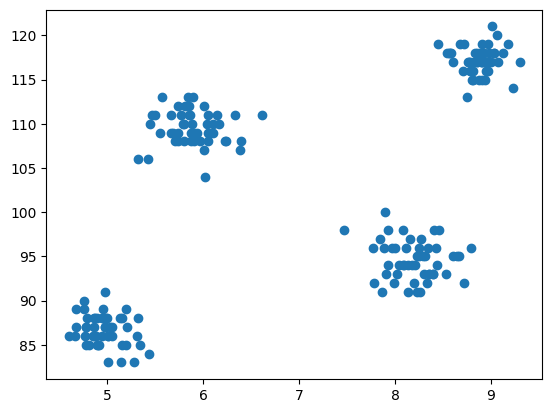

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df['cgpa'], df['iq'])

### 3. Model Training

In [5]:
from sklearn.cluster import KMeans

In [6]:
# k = 1, 2, ... 10

wcss = []

for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit_predict(df)
  wcss.append(km.inertia_)

In [7]:
wcss

[29957.898288,
 4184.14127,
 2362.7133489999997,
 681.96966,
 582.7491892238326,
 395.9605877691832,
 377.52132581797173,
 338.9072355380117,
 206.31644521295698,
 189.47762137168084]

### 4. Elbow Curve

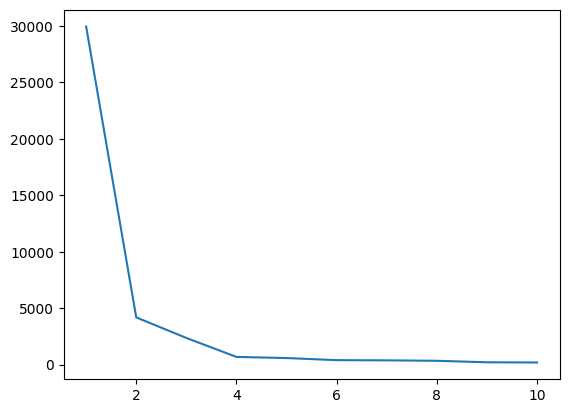

In [8]:
x = range(1,11)
y = wcss

plt.plot(x, y)

### 5. Predictions

In [9]:
X = df.iloc[:, :].values

km = KMeans(n_clusters=4)

y_means = km.fit_predict(X)

In [10]:
y_means

array([1, 2, 3, 3, 2, 2, 3, 0, 2, 3, 1, 2, 3, 1, 2, 3, 2, 3, 2, 2, 3, 1,
       3, 1, 1, 3, 1, 0, 3, 2, 0, 2, 0, 2, 3, 3, 0, 2, 1, 2, 1, 3, 3, 1,
       0, 0, 3, 2, 0, 2, 1, 1, 0, 3, 0, 2, 2, 0, 2, 0, 2, 3, 3, 0, 1, 0,
       3, 1, 2, 3, 2, 0, 3, 1, 2, 0, 2, 0, 1, 3, 3, 0, 2, 1, 0, 1, 0, 2,
       0, 2, 0, 0, 3, 1, 3, 3, 0, 3, 1, 0, 2, 1, 1, 0, 1, 1, 3, 1, 0, 0,
       3, 0, 2, 2, 3, 0, 3, 2, 0, 1, 1, 2, 3, 0, 3, 1, 3, 2, 1, 3, 3, 2,
       1, 1, 2, 0, 2, 1, 3, 3, 3, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0,
       1, 3, 2, 0, 2, 3, 1, 0, 2, 3, 0, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 3,
       0, 2, 1, 0, 0, 2, 2, 2, 3, 1, 3, 3, 0, 2, 3, 3, 1, 1, 3, 1, 0, 2,
       2, 0])

In [11]:
# y_means[ X[ y_means == 0] ]

X[ y_means== 0, 1]

array([115., 119., 117., 118., 118., 116., 116., 119., 116., 115., 115.,
       117., 118., 113., 116., 118., 117., 121., 116., 117., 117., 117.,
       114., 118., 118., 119., 118., 118., 117., 118., 117., 119., 118.,
       118., 117., 117., 117., 116., 118., 119., 117., 119., 120., 117.,
       115., 115., 117., 116., 118., 117.])

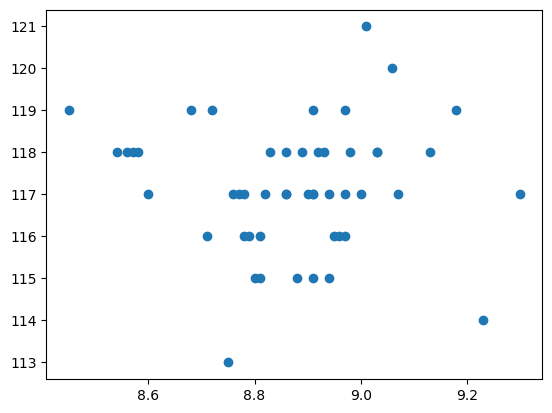

In [12]:
x = X[ y_means==0, 0]
y = X[ y_means==0, 1]

plt.scatter(x, y)

### Predicted Clustered

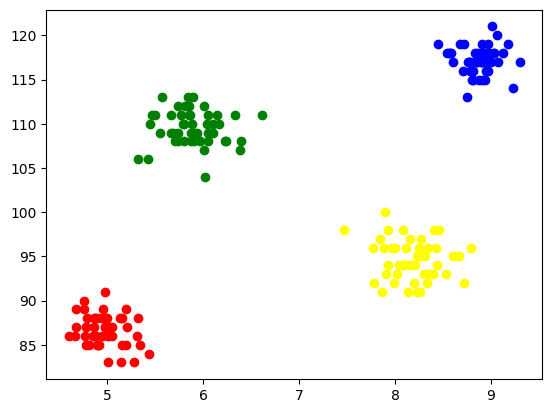

In [13]:
plt.scatter( X[y_means==0, 0], X[ y_means==0, 1], color='blue')
plt.scatter( X[y_means==1, 0], X[ y_means==1, 1], color='red')
plt.scatter( X[y_means==2, 0], X[ y_means==2, 1], color='green')
plt.scatter( X[y_means==3, 0], X[ y_means==3, 1], color='yellow')


## KMeans 3D Data

In [14]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

# Dummy data: For the sake of understanding, in the next we'll work on real time data
X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [15]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [16]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

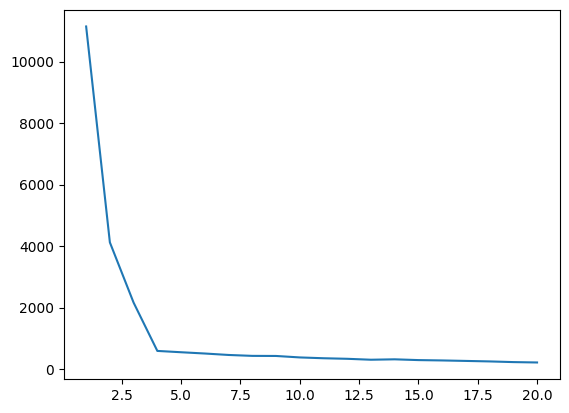

In [17]:
plt.plot(range(1,21),wcss)

In [18]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [19]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [20]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()

### End of Notebook